# Text Analysis

In [30]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import json
import re
from collections import Counter


import string
import nltk

## Process the S&P500 articles

**Step 1**: Load the "sp500_wiki_articles.json", use the `text_preprocessor` function from our class demo (or some other sequence of functions) to clean these articles up, and save the cleaned content to "sp500_wiki_articles_cleaned.json". Note: "cleaning" the articles up will incude tokenizing, removing stop words/cases, lemmatizing, etc.

_Remember to import the necessary packages for text analysis._

In [31]:
with open('sp500_wiki_articles.json','r') as f:
    arts = json.load(f)

In [32]:
print("There are {0} wikipedia articles of S&P500 companies.".format(len(arts)))

# Good to know 500 = 500 and that the dataset is complete

There are 500 wikipedia articles of S&P500 companies.


In [33]:
example = arts['Cigna']
example

'Bloomfield, Connecticut, United States \n\nCigna is an American worldwide health services organization based in suburban Bloomfield, Connecticut and Philadelphia, Pennsylvania.  Its insurance subsidiaries are major providers of medical, dental, disability, life and accident insurance and related products and services, the majority of which are offered through employers and other groups (e.g. governmental and non-governmental organizations, unions and associations).\n\nCigna offers Medicare and Medicaid products and health, life and accident insurance coverages primarily to individuals in the U.S. and selected international markets. In addition to its ongoing operations described above, Cigna also has certain run-off operations, including a Run-off Reinsurance segment. In the Phoenix metropolitan area, Cigna runs a full-service staff-model HMO (health maintenance organization) with satellite clinics throughout the region, known as the Cigna Medical Group.\n\nCigna Global Health Benefit

In [34]:
len(example)

9433

### nltk downloads

In [35]:
nltk.download('punkt') # tokenizer
nltk.download('stopwords') # stopwords
nltk.download('vader_lexicon') # sentiment lexicon - we'll use this in the next lecture

[nltk_data] Downloading package punkt to C:\Users\Ryan
[nltk_data]     Soltau\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ryan
[nltk_data]     Soltau\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Ryan
[nltk_data]     Soltau\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Tokenization

In [36]:
example_ws_tokens = example.split(' ')
print("There are {0:,} words when splitting on white spaces.".format(len(example_ws_tokens)))
example_ws_tokens[:25]

There are 1,440 words when splitting on white spaces.


['Bloomfield,',
 'Connecticut,',
 'United',
 'States',
 '\n\nCigna',
 'is',
 'an',
 'American',
 'worldwide',
 'health',
 'services',
 'organization',
 'based',
 'in',
 'suburban',
 'Bloomfield,',
 'Connecticut',
 'and',
 'Philadelphia,',
 'Pennsylvania.',
 '',
 'Its',
 'insurance',
 'subsidiaries',
 'are']

In [37]:
example_re_tokens = re.split(r'\s+',example)
print("There are {0:,} words when splitting on white spaces with regular expressions.".format(len(example_re_tokens)))
example_re_tokens[0:25]

There are 1,464 words when splitting on white spaces with regular expressions.


['Bloomfield,',
 'Connecticut,',
 'United',
 'States',
 'Cigna',
 'is',
 'an',
 'American',
 'worldwide',
 'health',
 'services',
 'organization',
 'based',
 'in',
 'suburban',
 'Bloomfield,',
 'Connecticut',
 'and',
 'Philadelphia,',
 'Pennsylvania.',
 'Its',
 'insurance',
 'subsidiaries',
 'are',
 'major']

In [38]:
example_wt_tokens = nltk.word_tokenize(example)
print("There are {0:,} words when splitting with word_tokenize.".format(len(example_wt_tokens)))
example_wt_tokens[:25]

There are 1,667 words when splitting with word_tokenize.


['Bloomfield',
 ',',
 'Connecticut',
 ',',
 'United',
 'States',
 'Cigna',
 'is',
 'an',
 'American',
 'worldwide',
 'health',
 'services',
 'organization',
 'based',
 'in',
 'suburban',
 'Bloomfield',
 ',',
 'Connecticut',
 'and',
 'Philadelphia',
 ',',
 'Pennsylvania',
 '.']

In [39]:
example_wpt_tokens = nltk.wordpunct_tokenize(example)
print("There are {0:,} words when splitting with wordpunct_tokenize.".format(len(example_wpt_tokens)))
example_wpt_tokens[:25]

There are 1,752 words when splitting with wordpunct_tokenize.


['Bloomfield',
 ',',
 'Connecticut',
 ',',
 'United',
 'States',
 'Cigna',
 'is',
 'an',
 'American',
 'worldwide',
 'health',
 'services',
 'organization',
 'based',
 'in',
 'suburban',
 'Bloomfield',
 ',',
 'Connecticut',
 'and',
 'Philadelphia',
 ',',
 'Pennsylvania',
 '.']

In [40]:
toktok = nltk.ToktokTokenizer()
example_ttt_tokens = toktok.tokenize(example)
print("There are {0:,} words when splitting with TokTok.".format(len(example_ttt_tokens)))

example_ttt_tokens[:25]

There are 1,612 words when splitting with TokTok.


['Bloomfield',
 ',',
 'Connecticut',
 ',',
 'United',
 'States',
 'Cigna',
 'is',
 'an',
 'American',
 'worldwide',
 'health',
 'services',
 'organization',
 'based',
 'in',
 'suburban',
 'Bloomfield',
 ',',
 'Connecticut',
 'and',
 'Philadelphia',
 ',',
 'Pennsylvania.',
 'Its']

In [41]:
for name,tokenlist in zip(['space_split','re_tokenizer','word_tokenizer','wordpunct_tokenizer','toktok_tokenizer'],[example_ws_tokens,example_re_tokens,example_wt_tokens,example_wpt_tokens,example_ttt_tokens]):
    print("{0:>20}: {1:,} total tokens, {2:,} unique tokens".format(name,len(tokenlist),len(set(tokenlist))))

         space_split: 1,440 total tokens, 746 unique tokens
        re_tokenizer: 1,464 total tokens, 747 unique tokens
      word_tokenizer: 1,667 total tokens, 709 unique tokens
 wordpunct_tokenizer: 1,752 total tokens, 724 unique tokens
    toktok_tokenizer: 1,612 total tokens, 726 unique tokens


### Word Cases

In [42]:
example_wpt_lowered = [token.lower() for token in example_wpt_tokens]
unique_wpt = len(set(example_wpt_tokens))
unique_lowered_wpt = len(set(example_wpt_lowered))
difference = unique_wpt - unique_lowered_wpt

print("There are {0:,} unique words in example before lowering and {1:,} after lowering,\na difference of {2} unique tokens.".format(unique_wpt,unique_lowered_wpt,difference))

There are 724 unique words in example before lowering and 695 after lowering,
a difference of 29 unique tokens.


### Stop Words

In [43]:
nltk.FreqDist(example_wpt_lowered).most_common(25)

[(',', 100),
 ('the', 85),
 ('.', 82),
 ('in', 53),
 ('and', 52),
 ('cigna', 49),
 ('of', 46),
 ('to', 44),
 ('a', 28),
 ('for', 21),
 ('insurance', 16),
 ('on', 16),
 ('its', 15),
 ('that', 15),
 ('health', 14),
 ('was', 14),
 ('-', 13),
 ('s', 13),
 ('with', 12),
 ('$', 10),
 ('by', 10),
 ('company', 10),
 ('are', 9),
 ('an', 8),
 ('as', 8)]

In [44]:
english_stopwords = nltk.corpus.stopwords.words('english')
english_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [45]:
list(string.punctuation)[:10]

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']

In [46]:
all_stopwords = english_stopwords + list(string.punctuation) + ['–']

In [47]:
# check the length
len(all_stopwords)

212

In [48]:
wpt_lowered_no_stopwords = []

for word in example_wpt_tokens:
    if word.lower() not in all_stopwords:
        wpt_lowered_no_stopwords.append(word.lower())

fdist_wpt_lowered_no_stopwords = nltk.FreqDist(wpt_lowered_no_stopwords)
fdist_wpt_lowered_no_stopwords.most_common(25)

[('cigna', 49),
 ('insurance', 16),
 ('health', 14),
 ('company', 10),
 ('000', 8),
 ('claims', 7),
 ('business', 7),
 ('international', 6),
 ('companies', 6),
 ('life', 5),
 ('medicare', 5),
 ('u', 5),
 ('would', 5),
 ('billion', 5),
 ('merger', 5),
 ('america', 5),
 ('california', 5),
 ('liver', 5),
 ('transplant', 5),
 ('sarkisyan', 5),
 ('2009', 5),
 ('connecticut', 4),
 ('states', 4),
 ('philadelphia', 4),
 ('operations', 4)]

Text(0, 0.5, 'Number of terms')

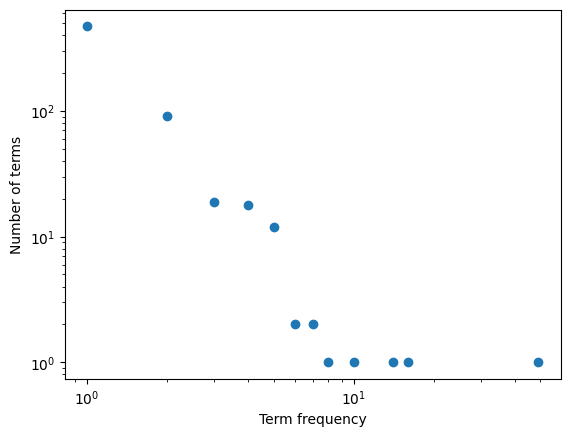

In [49]:
freq_counter = Counter(fdist_wpt_lowered_no_stopwords.values())

f,ax = plt.subplots(1,1)

ax.scatter(x=list(freq_counter.keys()),y=list(freq_counter.values()))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Term frequency')
ax.set_ylabel('Number of terms')

### Lemmantization

In [50]:
from nltk.corpus import wordnet

from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatizer(token):
    token,tb_pos = nltk.pos_tag([token])[0]
    pos = get_wordnet_pos(tb_pos)
    lemma = wnl.lemmatize(token,pos)
    return lemma

In [51]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Ryan
[nltk_data]     Soltau\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
wpt_lemmatized = [lemmatizer(t) for t in wpt_lowered_no_stopwords]
[(i,j) for (i,j) in list(zip(wpt_lowered_no_stopwords,wpt_lemmatized)) if len(i) != len(j)][:25]

[('states', 'state'),
 ('services', 'service'),
 ('based', 'base'),
 ('subsidiaries', 'subsidiary'),
 ('providers', 'provider'),
 ('products', 'product'),
 ('services', 'service'),
 ('offered', 'offer'),
 ('employers', 'employer'),
 ('groups', 'group'),
 ('organizations', 'organization'),
 ('unions', 'union'),
 ('associations', 'association'),
 ('offers', 'offer'),
 ('products', 'product'),
 ('coverages', 'coverage'),
 ('individuals', 'individual'),
 ('selected', 'select'),
 ('markets', 'market'),
 ('operations', 'operation'),
 ('operations', 'operation'),
 ('including', 'include'),
 ('runs', 'run'),
 ('clinics', 'clinic'),
 ('known', 'know')]

In [53]:
def text_preprocessor(text):
    """Takes a large string (document) and returns a list of cleaned tokens"""
    tokens = nltk.wordpunct_tokenize(text)
    clean_tokens = []
    for t in tokens:
        if t.lower() not in all_stopwords and len(t) > 2:
            clean_tokens.append(lemmatizer(t.lower()))
    return clean_tokens

In [54]:
# Blank dictionary for each clean bio
cleaned_arts = {}

for art_name,art_text in arts.items():
    cleaned_arts[art_name] = text_preprocessor(art_text)

# Save to disk
with open('sp500_wiki_articles_cleaned.json','w') as f:
    json.dump(cleaned_arts,f)

### Stemming

##  Exploratory text analysis

**Step 2**: Compute <span style="color:red"> at least 3 </span> descriptive statistics about the company articles. This can include the articles with the most words, most unique words, greatest lexical diversity, most used words across articles, and number of unique words across all articles. 

_Describe your findings for each of the descriptive statistics in substantive terms._


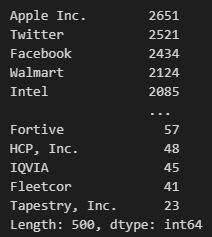
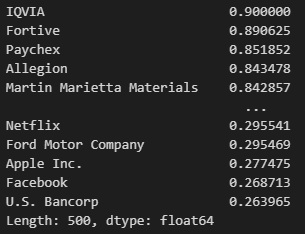

I thought the above was interesting since Facebook has the second most unique words in its articles, but in the lexical diversity it's second to last. I love moments like this because it hints at a level of understanding that you haven't reached yet. I read through this [article](https://textinspector.com/lexical-density-vs-lexical-diversity) which helped put it in a bit of context. My best guess is that it hints that the article while using a lot of unique words uses less "complex" text and synonyms.


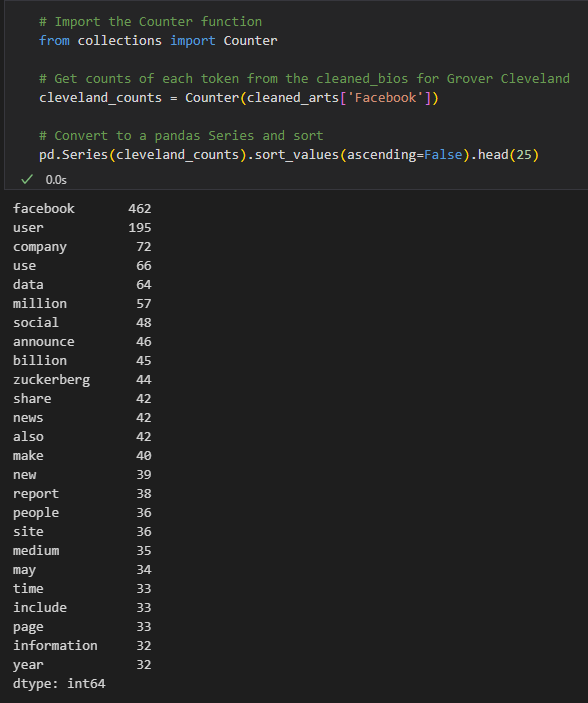

The above inspired me to take a look into Facebook's token counts. 44 zuckerbergs seems like far too few zuckerbergs and if I were zuckerberg I'd up the zuckerbergs but the rest seem reasonable. In this list I see some words that I would consider Stop Words such as "may" and "also", I'd guess that they're kept if you're performing your analysis in Bigrams or Trigrams.

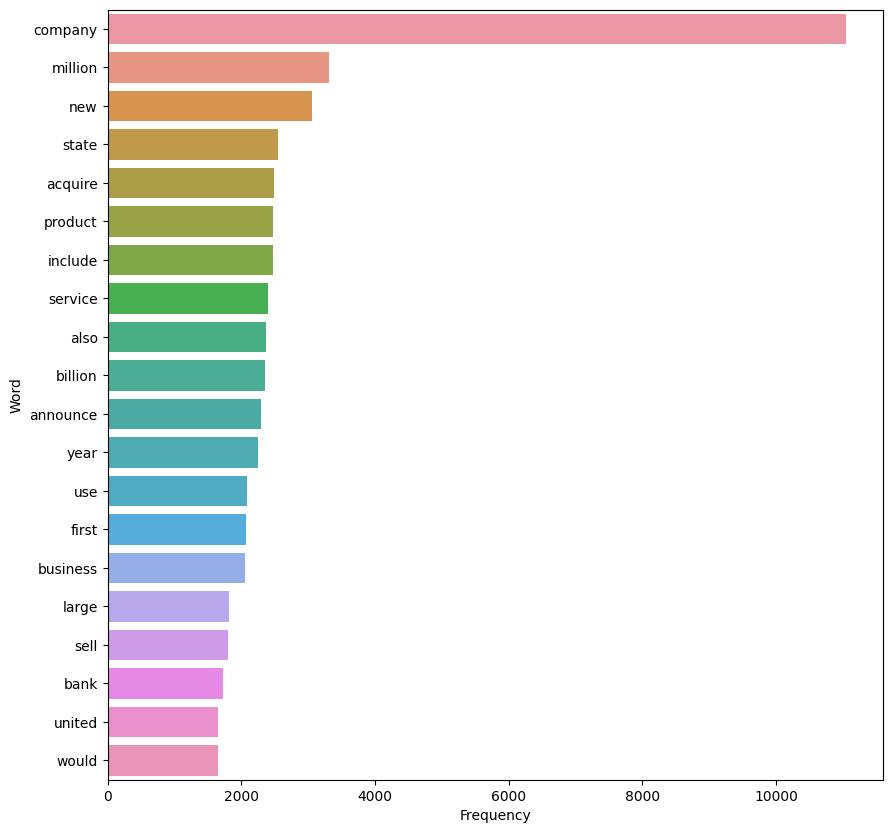

Lastly I will look at the bar chart for all token counts for all wikipedia articles. It's not suprising that most of these are generic business terms. There are several terms that hint towards the company's growth like "million", "billion", "acquire", "large", and maybe "united". I wonder what the all token counts for these companies PR statements would look like, I'd guess lots of the same general business terms with the removal of "growth" terms and addition of "whoopsie our bad" or "look what we did" terms. 



In [55]:
art_total_words = {}

for art_name,art_text in cleaned_arts.items():
    art_total_words[art_name] = len(art_text)

pd.Series(art_total_words).sort_values(ascending=False)

Apple Inc.                   9554
Facebook                     9058
Twitter                      8145
Walmart                      6993
Goldman Sachs                6883
                             ... 
Martin Marietta Materials      70
Fortive                        64
Fleetcor                       51
IQVIA                          50
Tapestry, Inc.                 31
Length: 500, dtype: int64

In [56]:
art_unique_words = {}

for art_name,art_text in cleaned_arts.items():
    art_unique_words[art_name] = len(set(art_text))

pd.Series(art_unique_words).sort_values(ascending=False)

Apple Inc.        2651
Twitter           2521
Facebook          2434
Walmart           2124
Intel             2085
                  ... 
Fortive             57
HCP, Inc.           48
IQVIA               45
Fleetcor            41
Tapestry, Inc.      23
Length: 500, dtype: int64

In [57]:
def lexical_diversity(token_list):
    unique_tokens = len(set(token_list))
    total_tokens = len(token_list)
    if total_tokens > 0:
        return unique_tokens/total_tokens
    else:
        return 0

In [58]:
# Let's employ the function
art_lexical_diversity = {}

for art_name,art_text in cleaned_arts.items():
    art_lexical_diversity[art_name] = lexical_diversity(art_text)

pd.Series(art_lexical_diversity).sort_values(ascending=False)

IQVIA                        0.900000
Fortive                      0.890625
Paychex                      0.851852
Allegion                     0.843478
Martin Marietta Materials    0.842857
                               ...   
Netflix                      0.295541
Ford Motor Company           0.295469
Apple Inc.                   0.277475
Facebook                     0.268713
U.S. Bancorp                 0.263965
Length: 500, dtype: float64

In [71]:
# Import the Counter function
from collections import Counter

# Get counts of each token from the cleaned_bios for Grover Cleveland
cleveland_counts = Counter(cleaned_arts['Facebook'])

# Convert to a pandas Series and sort
pd.Series(cleveland_counts).sort_values(ascending=False).head(25)

facebook       462
user           195
company         72
use             66
data            64
million         57
social          48
announce        46
billion         45
zuckerberg      44
share           42
news            42
also            42
make            40
new             39
report          38
people          36
site            36
medium          35
may             34
time            33
include         33
page            33
information     32
year            32
dtype: int64

In [61]:
# Import the Counter function
from collections import Counter

# Get counts of each token from the cleaned_bios for Grover Cleveland
cleveland_counts = Counter(cleaned_arts['U.S. Bancorp'])

# Convert to a pandas Series and sort
pd.Series(cleveland_counts).sort_values(ascending=False).head(25)

bank           128
bancorp         85
acquisition     69
first           49
office          48
national        45
oregon          42
announce        40
base            37
company         33
branch          30
pending         30
chief           29
million         29
president       26
chairman        25
complete        25
officer         24
california      24
corporation     24
executive       21
stock           20
washington      19
state           17
position        16
dtype: int64

In [62]:
art_word_counts = {}

for art_name,art_text in cleaned_arts.items():
    art_word_counts[art_name] = Counter(art_text)

art_word_counts_df = pd.DataFrame(art_word_counts).T # transpose it

art_word_counts_df.to_csv('art_word_counts.csv',encoding='utf8') # read to .csv if you want

There are 31,828 unique words across the 500 presidents.


In [70]:
print("There are {0:,} unique words across the {1} S&P500 Wikipedia Articles.".format(art_word_counts_df.shape[1],art_word_counts_df.shape[0]))


There are 31,828 unique words across the 500 S&P500 Wikipedia Articles.


In [63]:
art_word_counts_df.sum().sort_values(ascending=False).head(20)

company     11042.0
million      3306.0
new          3052.0
state        2545.0
acquire      2488.0
product      2473.0
include      2472.0
service      2398.0
also         2366.0
billion      2361.0
announce     2289.0
year         2249.0
use          2084.0
first        2068.0
business     2058.0
large        1822.0
sell         1799.0
bank         1727.0
united       1654.0
would        1652.0
dtype: float64

In [64]:
# Get the counts in an object we can use
art_counts = art_word_counts_df.sum().sort_values(ascending=False)

# make it a dataframe for plotting
art_counts = pd.DataFrame(art_counts)

In [65]:
# Rename the axis and reset the index
art_counts = art_counts.rename_axis('index1').reset_index()

# Rename the columns something sensible
art_counts = art_counts.rename(columns={"index1": "Word", 0: "Frequency"})

In [66]:
# Take a look
art_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31828 entries, 0 to 31827
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Word       31828 non-null  object 
 1   Frequency  31828 non-null  float64
dtypes: float64(1), object(1)
memory usage: 497.4+ KB


<Axes: xlabel='Frequency', ylabel='Word'>

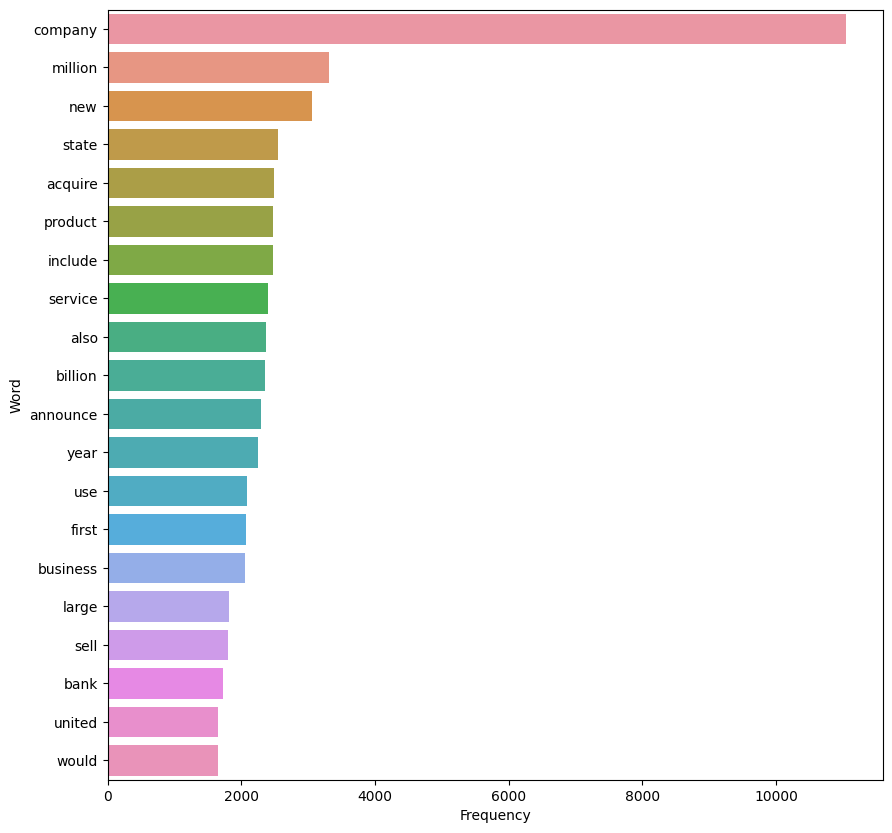

In [67]:
import seaborn as sns

# Set figure size
plt.figure(figsize = (10,10))

# Plot the most frequent terms
sns.barplot(x="Frequency", y="Word", data=art_counts.head(20))

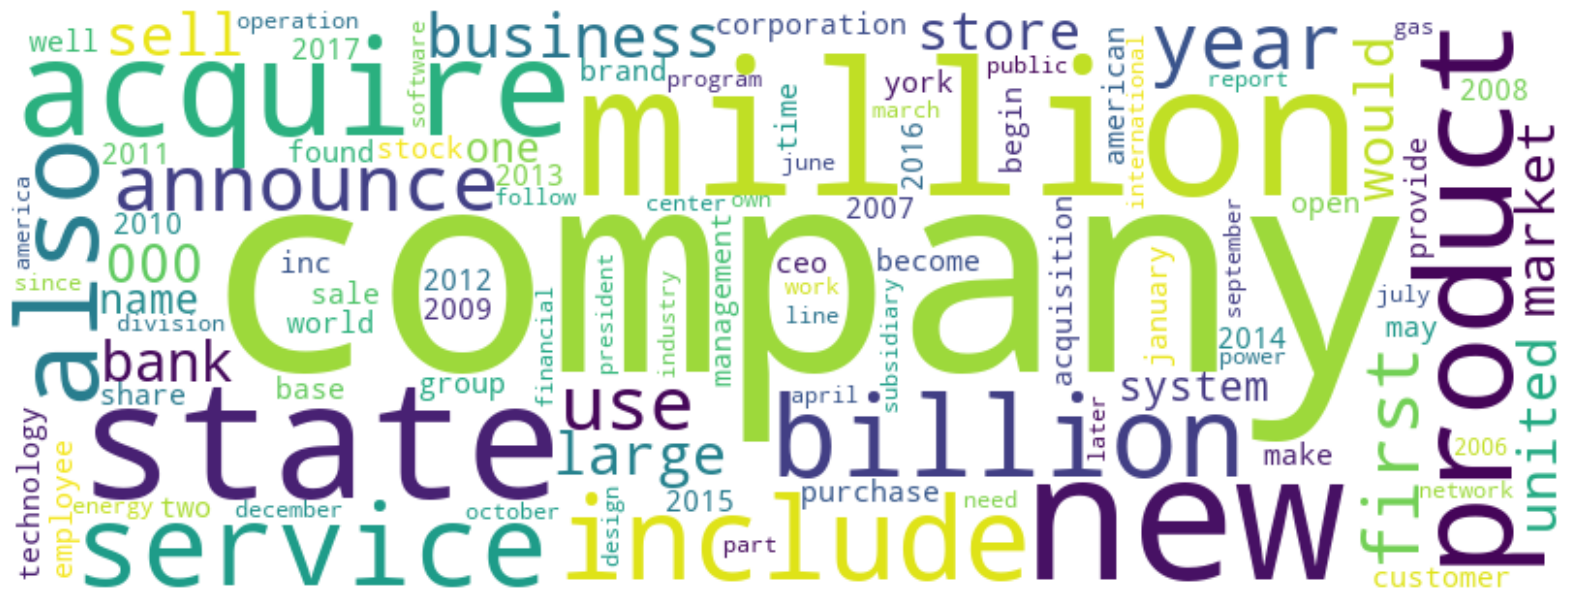

In [68]:
from wordcloud import WordCloud  # Create wordclouds

# Create a dictionary of most frequent terms (required for word clouds)
term_dict = art_counts.set_index('Word')['Frequency'].to_dict()

# Create a wordcloud of most frequent terms
wc = WordCloud(width=800, height=300, background_color="white",
               max_words=100)

wc.generate_from_frequencies(term_dict)

# Display the cloud
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()